# API interfacing  

Today we will be going over how to collect open-source data from Steam. Steam is the world's largest distributor of PC games today and is kind enough to offer many tools for the public to see what is going on in the background of the Steam servers. Today, we will be collecting a list of the most popular games in America and matching those items up with the amount you or a customer would currently pay for that game. We will also be looking up how many achievements each game has to compare between the different games.   

## Website Guide   
Most of the information we will be using will come from this [github](https://github.com/Revadike/InternalSteamWebAPI/wiki).

It is open sorce and will not require an authenticator key.  

## Imports and Setup

In [72]:
## all imports
import pandas as pd
import requests
import json

## API Parts  
To start off we need to know how to pull the dictionary from the internet. This will consist of a few steps.   
1. The URL - This is the link to where the information is stored 
2. The Response - This is the actual "Get" commande telling the website we want information
3. The Conversion - This changes the information to a readable and searchable JSON file. (If you want more info on JSON files please read up [here](https://www.programiz.com/python-programming/json)

In [39]:
#Top Us Games
url = 'https://store.steampowered.com/search/results/?filter=ustopsellers&ignore_preferences=1&category1=&json=1'
response = requests.get(url)
json = response.json()

Let us print out that JSON to see what it looks like.

In [41]:
json

{'desc': '',
 'items': [{'name': 'Apex Legends™',
   'logo': 'https://cdn.akamai.steamstatic.com/steam/apps/1172470/capsule_sm_120.jpg?t=1629219806'},
  {'name': 'Destiny 2',
   'logo': 'https://cdn.akamai.steamstatic.com/steam/apps/1085660/capsule_sm_120.jpg?t=1631638993'},
  {'name': 'Counter-Strike: Global Offensive',
   'logo': 'https://cdn.akamai.steamstatic.com/steam/apps/730/capsule_sm_120.jpg?t=1631908705'},
  {'name': 'FINAL FANTASY XIV Online',
   'logo': 'https://cdn.akamai.steamstatic.com/steam/apps/39210/capsule_sm_120.jpg?t=1621453463'},
  {'name': 'Red Dead Redemption 2',
   'logo': 'https://cdn.akamai.steamstatic.com/steam/apps/1174180/capsule_sm_120.jpg?t=1618851907'},
  {'name': 'DEATHLOOP',
   'logo': 'https://cdn.akamai.steamstatic.com/steam/apps/1252330/capsule_sm_120.jpg?t=1631723461'},
  {'name': 'Call of Duty®: Black Ops III',
   'logo': 'https://cdn.akamai.steamstatic.com/steam/apps/311210/capsule_sm_120.jpg?t=1624408705'},
  {'name': 'NARAKA: BLADEPOINT',
   '

While that might not look organized we can convert that into a pandas dataframe to be able to see the information we want. For this lesson we will also be only looking at the top 25 games currently, but if you wanted to see more you could change this number to whatever you want. 

In [42]:
us_top = pd.DataFrame(json['items'], columns = ['name'])
us_top = us_top.head(25)
us_top.head(10)

,name
0,Apex Legends™
1,Destiny 2
2,Counter-Strike: Global Offensive
3,FINAL FANTASY XIV Online
4,Red Dead Redemption 2
5,DEATHLOOP
6,Call of Duty®: Black Ops III
7,NARAKA: BLADEPOINT
8,Dead by Daylight
9,SMITE®


See! That is a better looking table of the top games on Steam in the US. 

Now to find more information. Everything on steam is indexed by its AppID. The list we already have does not contain that information so we need to pull it from another API. The gitub also has a link to the documentation for this URL if you need more help.  

In [46]:
#All Games and their AppId 
url = 'https://api.steampowered.com/ISteamApps/GetAppList/v2/'
response = requests.get(url)
allapp = response.json()
#I am not going to print this out as it's a very large dictionary
allapp

{'applist': {'apps': [{'appid': 216938,
    'name': 'Pieterw test app76 ( 216938 )'},
   {'appid': 660010, 'name': 'test2'},
   {'appid': 660130, 'name': 'test3'},
   {'appid': 1118314, 'name': ''},
   {'appid': 895110, 'name': 'Magical Battle Cry'},
   {'appid': 895120, 'name': 'Dog Jam'},
   {'appid': 895130, 'name': '東周列萌志 Philosophic Love－三倍存檔欄位Save Slots＋'},
   {'appid': 895140, 'name': 'JJBoom'},
   {'appid': 895150, 'name': 'Endless Battle'},
   {'appid': 895160, 'name': 'Farm Folks'},
   {'appid': 895170, 'name': 'Drop Up'},
   {'appid': 895180, 'name': 'Majin Woman'},
   {'appid': 895190, 'name': 'Pendle Hill'},
   {'appid': 895200, 'name': 'Swords of Gargantua'},
   {'appid': 895210, 'name': 'On Board Remastered'},
   {'appid': 895220, 'name': 'Leaflet Love Story'},
   {'appid': 895240, 'name': 'Little Busters! - Original Soundtrack'},
   {'appid': 895250, 'name': 'Harmonia - Original Soundtrack'},
   {'appid': 895260, 'name': 'Harmonia - Piano Arrange Album - teneritas'},
  

In [33]:
#Set all the games and ID values to a dataframe. 
#To do this we are going to create a slice of the dictionary with the wanted data.
df_all = pd.DataFrame(allapp['applist']['apps'], columns = ['appid', 'name'])

#just to check that the name search brings up the proper ID values
#Using a game on the Top Games list from before we can see:
df_all[df_all['name'] == 'Destiny 2']

,appid,name
95051,1085660,Destiny 2


In [34]:
#just to check that the AppID search brings up the proper game title
df_all[df_all['appid'] == 1085660]

,appid,name
95051,1085660,Destiny 2


## Merging and Woes 
Now that we have a list of both the top 25 games and their respective AppID's it is time to merge them.  

We will be using a merge left as we want to maintain all of the original values in the Top Games list. 

In [75]:
joined = pd.merge(us_top, df_all, how= "left", on=['name'])
joined.head(10)

,name,appid
0,Apex Legends™,NaN
1,Destiny 2,1085660.0
2,Counter-Strike: Global Offensive,730.0
3,FINAL FANTASY XIV Online,39210.0
4,Red Dead Redemption 2,1174180.0
5,DEATHLOOP,1252330.0
6,Call of Duty®: Black Ops III,NaN
7,NARAKA: BLADEPOINT,1203220.0
8,Dead by Daylight,381210.0
9,SMITE®,NaN


Oh No! there are a bunch of NaN values in this sheet. We cannot lookup more info without them so lets try and fix that.  

In [76]:
# I spent far to long getting this to run, but it does and it upsets me that I should have just made 
#  another column in each dataset that was stripped of all special characters and merged those columns... But now  I have this. 

# This will check every AppID in our joined dataframe. 
for i in range(len(joined['name'])): 
    if pd.isna(joined.iloc[i,1]) == True : # When it finds a value of NaN
        
        #Creates a variable of the name of the game assosicated with that NaN, but with no special characters
        title = ''.join(filter(str.isalnum, joined.iloc[i,0])) 

        #This loop checks each name in the AppID list for a match after being stripped of special characters
        for j in range(len(df_all['name'])):
            # if there is a match after being stripped of special characters then:
            if (''.join(filter(str.isalnum, df_all.iloc[j,1])) == title):
                # Set the AppID of the match to replace the NaN on the joined dataframe
                joined.iloc[i,1] = df_all.iloc[j,0]
                
                break #Stop the loop when a match is found 

In [77]:
joined.head() #Print out the table to inspect for changes if you want

,name,appid
0,Apex Legends™,1172470.0
1,Destiny 2,1085660.0
2,Counter-Strike: Global Offensive,730.0
3,FINAL FANTASY XIV Online,39210.0
4,Red Dead Redemption 2,1174180.0


No more NaN! Now on to grabbing store information  

## Store Information

In [73]:
#This is outdated and only grabs the infor for a single entry. This is usefull for testing but not on a DS level. 


#Get app store page information 
id = 1172470 #Just using the #1 Game for testing and to show how this works. 
id_str = str(id) #The code needs the ID to be in a string. In the loop later we will do this automatically

#This slash says to keep looking for more info
url = f'https://store.steampowered.com/api/appdetails' \
f'?appids={id_str}' \
#if we had more parameters we would add them in the same way more info below.
response = requests.get(url)
response
#Response [200] means that the request for information went through. 

<Response [200]>

more info on the strings [here](https://realpython.com/python-f-strings/)

In [55]:
#Convert it to a JSON disctionary 
final = response.json()
#Print to see the results
final  


{'1172470': {'success': True,
  'data': {'type': 'game',
   'name': 'Apex Legends™',
   'steam_appid': 1172470,
   'required_age': 0,
   'is_free': True,
   'controller_support': 'full',
   'dlc': [1623570,
    1622670,
    1445990,
    1479451,
    1467350,
    1445950,
    1311098,
    1311090,
    1311091,
    1311092],
   'detailed_description': 'Conquer with character in Apex Legends, a free-to-play Hero shooter where legendary characters with powerful abilities team up to battle for fame &amp; fortune on the fringes of the Frontier. <br><br>Master an ever-growing roster of diverse Legends, deep tactical squad play and bold new innovations that go beyond the Battle Royale experience—all within a rugged world where anything goes. Welcome to the next evolution of Hero Shooter.<h2 class="bb_tag"><strong>KEY FEATURES</strong></h2><ul class="bb_ul"><li><strong>A Roster of Legendary Characters</strong> -Master a growing roster of powerful Legends, each with their own unique personality,

Now there is tons of infomation and we only need a few bits of it. We are looking for "is_free': True" or a Price and the number of achievments. We are also going to do this for each item on the list "joined"  
If a value does not exist for a given game we are just gonna output a zero back to the dataframe as it means that either the price is zero dollars or there are zero achievements. 

In [78]:
first = True 
for i in range(len(joined['name'])):
    id = int(joined.iloc[i,1])
    
    url = f'https://store.steampowered.com/api/appdetails?cc=US' \
    f'&appids={id}' \
    
    response = requests.get(url)
    app = response.json()
    
    id_str = str(id)
    if first == True:
        
        try:
            achievements = [app[id_str]['data']['achievements']['total']]
        except KeyError:
            achievements = [0] 
        
        try:
            price = [app[id_str]['data']['price_overview']['final']/100]
        except KeyError:
            price = [0]        
        
        first = False
    
    else:
        try:
            achievements.append(app[id_str]['data']['achievements']['total'])
        except KeyError:
            achievements.append(0) 
        
        try:
            price.append(app[id_str]['data']['price_overview']['final']/100)
        except KeyError:
            price.append(0)
            
joined['price']= price
joined['achievements'] = achievements
joined.head()

,name,appid,price,achievements
0,Apex Legends™,1172470.0,0.00,12
1,Destiny 2,1085660.0,0.00,23
2,Counter-Strike: Global Offensive,730.0,0.00,167
3,FINAL FANTASY XIV Online,39210.0,19.99,0
4,Red Dead Redemption 2,1174180.0,40.19,51


## Congratulations!
We are almost done! If you were perceptive you would see we actually picked up a few extra extries in the merge. We could have gotten rid of them then, but it would have been hard to tell what was the game and what was a DLC or extra item. With the data we have now, we can safely remove the second entry of each duplicated value. After reindexing this will give us the nice clean list of top 25 games on the US steam store.

In [81]:
df = joined.copy()
df = df.drop_duplicates(subset='name').reset_index(drop = True)
df = df.reset_index()
df

,index,name,appid,price,achievements
0,0,Apex Legends™,1172470.0,0.00,12
1,1,Destiny 2,1085660.0,0.00,23
2,2,Counter-Strike: Global Offensive,730.0,0.00,167
3,3,FINAL FANTASY XIV Online,39210.0,19.99,0
4,4,Red Dead Redemption 2,1174180.0,40.19,51
5,5,DEATHLOOP,1252330.0,59.99,54
6,6,Call of Duty®: Black Ops III,311210.0,35.99,98
7,7,NARAKA: BLADEPOINT,1203220.0,19.99,0
8,8,Dead by Daylight,381210.0,19.99,182
9,9,SMITE®,386360.0,0.00,291


## Stats  
A higher ranked game will cost more than its counterparts.

In [90]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

array([[1.        , 0.16844843],
       [0.16844843, 1.        ]])

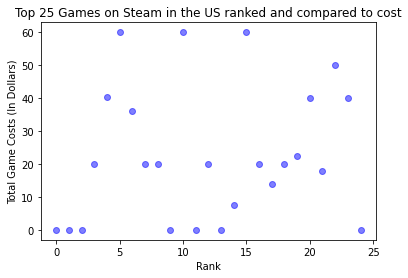

In [98]:
plt.scatter(x = 'index', y = 'price', c= 'Blue', alpha=0.5, data=df)
plt.xlabel('Rank')
plt.ylabel('Total Game Costs (In Dollars)')
plt.title('Top 25 Games on Steam in the US ranked and compared to cost')
np.corrcoef(df['index'], df['price'])

There appears to be nearly zero correlation between costs of a game on the list and its ranking. 

## Question 2
What is the relationship between cost and the number of achievements?

array([[ 1.        , -0.22879313],
       [-0.22879313,  1.        ]])

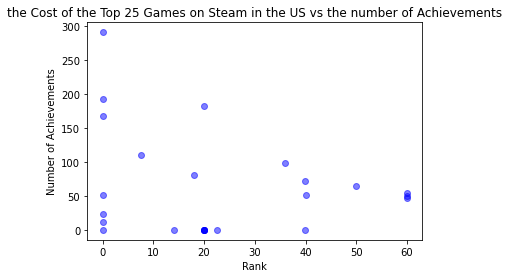

In [99]:
plt.scatter(y = 'achievements', x = 'price', c= 'Blue', alpha=0.5, data=df)
plt.xlabel('Rank')
plt.ylabel('Number of Achievements')
plt.title('the Cost of the Top 25 Games on Steam in the US vs the number of Achievements')
np.corrcoef(df['achievements'], df['price'])

There appears to be a lightly negative correlation. More testing is needed, but it appears that the more a game costs the less achievements it has.